# Customer Churn - Model Building & Evaluation

This notebook builds and compares predictive models:
1. Load preprocessed data
2. Train multiple models
3. Evaluate performance
4. Compare results
5. Analyze feature importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully")

Libraries loaded successfully


## 1. Load Preprocessed Data

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').squeeze()
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nChurn distribution in test set:")
print(y_test.value_counts())

Training set: 5634 samples, 30 features
Test set: 1409 samples

Churn distribution in test set:
Churn
0    1035
1     374
Name: count, dtype: int64


## 2. Define Evaluation Functions

We'll use several metrics:
- **Accuracy**: Overall correct predictions
- **Precision**: Of predicted churners, how many actually churned?
- **Recall**: Of actual churners, how many did we catch?
- **F1-Score**: Balance between precision and recall
- **ROC-AUC**: Overall model discrimination ability

In [3]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate a model and return metrics."""
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }
    
    return metrics, y_pred, y_prob

def plot_confusion_matrix(y_test, y_pred, model_name):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

print("Evaluation functions defined")

Evaluation functions defined


## 3. Model 1: Logistic Regression (Baseline)

A simple, interpretable model. Good starting point.

In [4]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate
lr_metrics, lr_pred, lr_prob = evaluate_model(lr_model, X_test, y_test, 'Logistic Regression')

print("Logistic Regression Results:")
print(f"  Accuracy:  {lr_metrics['Accuracy']:.3f}")
print(f"  Precision: {lr_metrics['Precision']:.3f}")
print(f"  Recall:    {lr_metrics['Recall']:.3f}")
print(f"  F1-Score:  {lr_metrics['F1-Score']:.3f}")
print(f"  ROC-AUC:   {lr_metrics['ROC-AUC']:.3f}")

Logistic Regression Results:
  Accuracy:  0.807
  Precision: 0.660
  Recall:    0.561
  F1-Score:  0.607
  ROC-AUC:   0.842


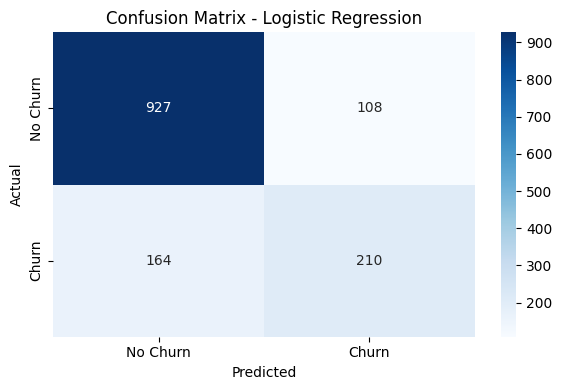

In [5]:
plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression')

## 4. Model 2: Random Forest

An ensemble model that builds many decision trees. Often more powerful than logistic regression.

In [6]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Evaluate
rf_metrics, rf_pred, rf_prob = evaluate_model(rf_model, X_test, y_test, 'Random Forest')

print("Random Forest Results:")
print(f"  Accuracy:  {rf_metrics['Accuracy']:.3f}")
print(f"  Precision: {rf_metrics['Precision']:.3f}")
print(f"  Recall:    {rf_metrics['Recall']:.3f}")
print(f"  F1-Score:  {rf_metrics['F1-Score']:.3f}")
print(f"  ROC-AUC:   {rf_metrics['ROC-AUC']:.3f}")

Random Forest Results:
  Accuracy:  0.796
  Precision: 0.648
  Recall:    0.508
  F1-Score:  0.570
  ROC-AUC:   0.839


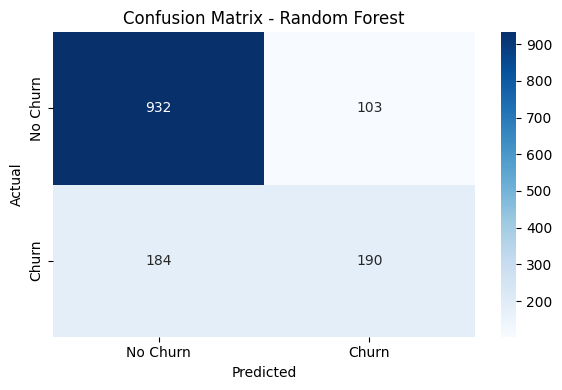

In [7]:
plot_confusion_matrix(y_test, rf_pred, 'Random Forest')

## 5. Model 3: XGBoost

Gradient boosting model. Often achieves best performance on tabular data.

In [8]:
# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Evaluate
xgb_metrics, xgb_pred, xgb_prob = evaluate_model(xgb_model, X_test, y_test, 'XGBoost')

print("XGBoost Results:")
print(f"  Accuracy:  {xgb_metrics['Accuracy']:.3f}")
print(f"  Precision: {xgb_metrics['Precision']:.3f}")
print(f"  Recall:    {xgb_metrics['Recall']:.3f}")
print(f"  F1-Score:  {xgb_metrics['F1-Score']:.3f}")
print(f"  ROC-AUC:   {xgb_metrics['ROC-AUC']:.3f}")

XGBoost Results:
  Accuracy:  0.796
  Precision: 0.638
  Recall:    0.532
  F1-Score:  0.580
  ROC-AUC:   0.841


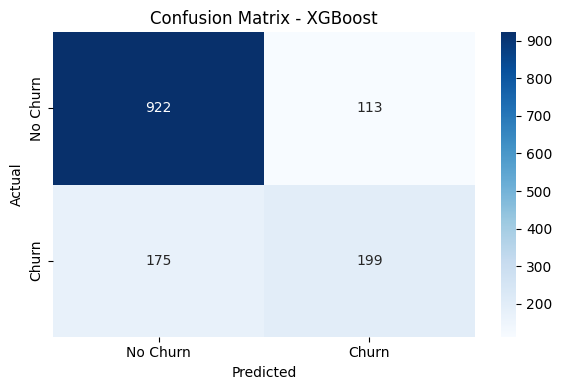

In [9]:
plot_confusion_matrix(y_test, xgb_pred, 'XGBoost')

## 6. Model Comparison

In [10]:
# Create comparison dataframe
results_df = pd.DataFrame([lr_metrics, rf_metrics, xgb_metrics])
results_df = results_df.set_index('Model')

# Format as percentages
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
print(results_df.round(3).to_string())
print("="*60)


MODEL COMPARISON
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                              
Logistic Regression     0.807      0.660   0.561     0.607    0.842
Random Forest           0.796      0.648   0.508     0.570    0.839
XGBoost                 0.796      0.638   0.532     0.580    0.841


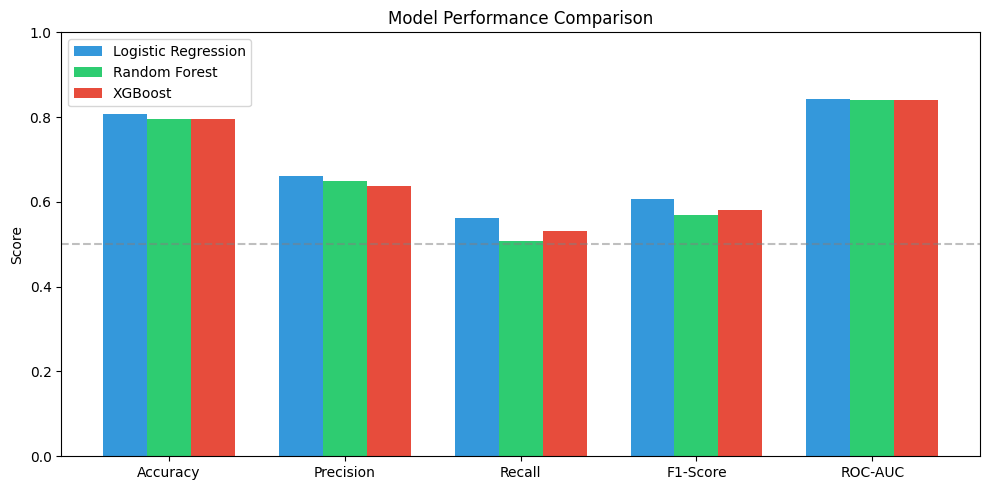

In [11]:
# Visual comparison
fig, ax = plt.subplots(figsize=(10, 5))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics_to_plot))
width = 0.25

bars1 = ax.bar(x - width, results_df.loc['Logistic Regression', metrics_to_plot], width, label='Logistic Regression', color='#3498db')
bars2 = ax.bar(x, results_df.loc['Random Forest', metrics_to_plot], width, label='Random Forest', color='#2ecc71')
bars3 = ax.bar(x + width, results_df.loc['XGBoost', metrics_to_plot], width, label='XGBoost', color='#e74c3c')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot)
ax.legend()
ax.set_ylim(0, 1)
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 7. ROC Curves

ROC curve shows the trade-off between true positive rate and false positive rate.

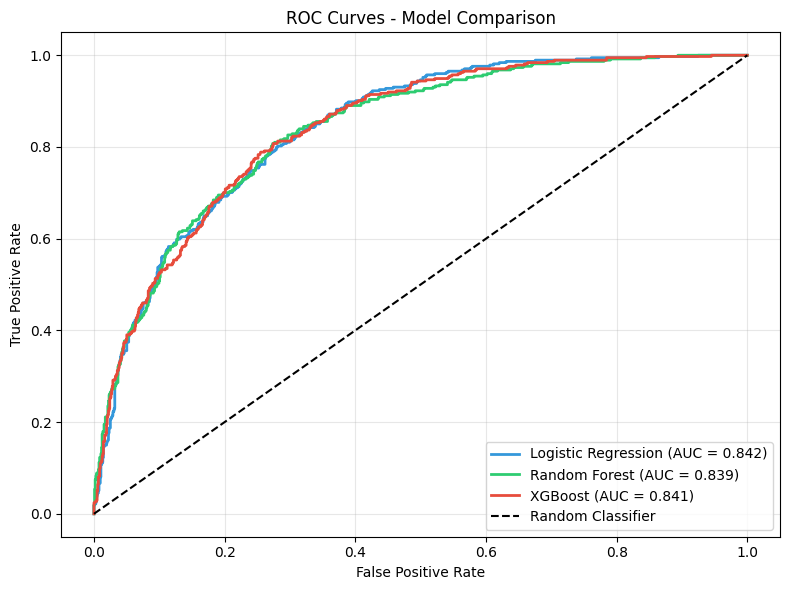

In [12]:
plt.figure(figsize=(8, 6))

# Plot ROC for each model
models = [
    ('Logistic Regression', lr_prob, '#3498db'),
    ('Random Forest', rf_prob, '#2ecc71'),
    ('XGBoost', xgb_prob, '#e74c3c')
]

for name, prob, color in models:
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color=color, linewidth=2)

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Feature Importance

Which features matter most for predicting churn?

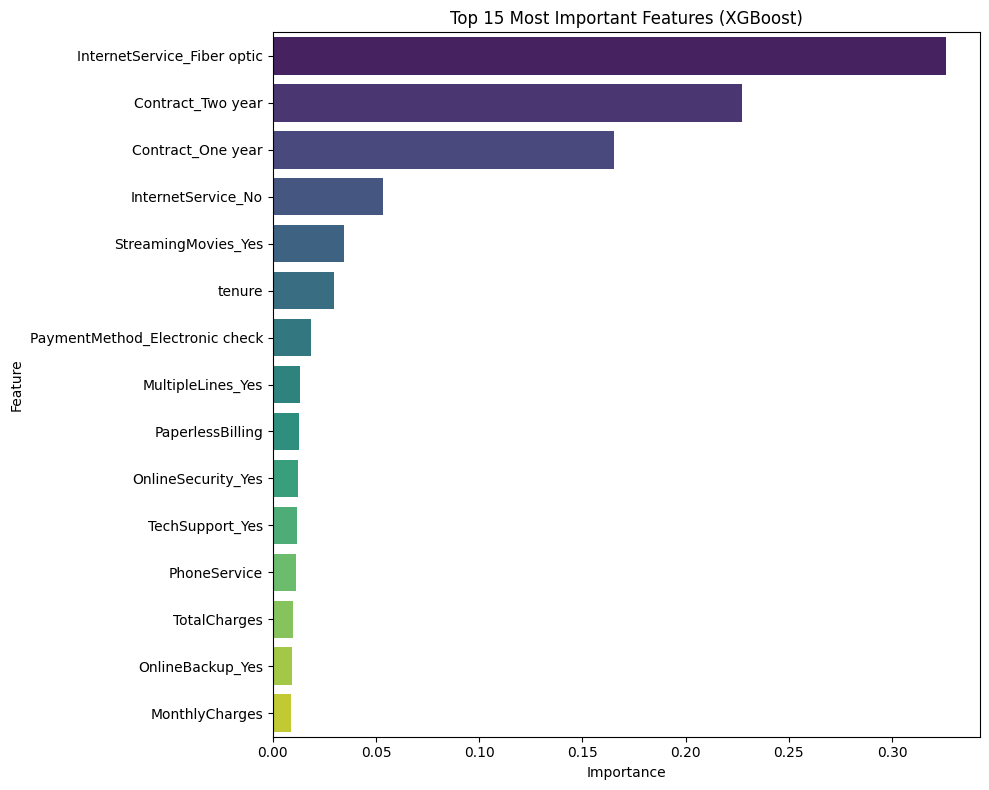

In [13]:
# Get feature importance from XGBoost (usually best model)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [14]:
print("Top 10 Features for Predicting Churn:")
print("="*40)
for i, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']:40} {row['importance']:.4f}")

Top 10 Features for Predicting Churn:
InternetService_Fiber optic              0.3263
Contract_Two year                        0.2271
Contract_One year                        0.1651
InternetService_No                       0.0536
StreamingMovies_Yes                      0.0344
tenure                                   0.0298
PaymentMethod_Electronic check           0.0183
MultipleLines_Yes                        0.0130
PaperlessBilling                         0.0129
OnlineSecurity_Yes                       0.0124


## 9. Business Insights

Let's translate the model findings into actionable business insights.

In [15]:
# Best model summary
best_model_name = results_df['ROC-AUC'].idxmax()
best_auc = results_df['ROC-AUC'].max()
best_recall = results_df.loc[best_model_name, 'Recall']

print("\n" + "="*60)
print("BUSINESS IMPACT SUMMARY")
print("="*60)
print(f"\nBest Model: {best_model_name}")
print(f"ROC-AUC: {best_auc:.3f}")
print(f"Recall: {best_recall:.3f} ({best_recall*100:.1f}% of churners identified)")

# Calculate potential impact
total_churners = y_test.sum()
identified_churners = int(total_churners * best_recall)

print(f"\nIn test set of {len(y_test)} customers:")
print(f"  - Actual churners: {total_churners}")
print(f"  - Model identifies: {identified_churners}")
print(f"\nIf average customer value is $500/year:")
print(f"  - Revenue at risk: ${total_churners * 500:,}")
print(f"  - Potential savings (if 50% retained): ${int(identified_churners * 500 * 0.5):,}")


BUSINESS IMPACT SUMMARY

Best Model: Logistic Regression
ROC-AUC: 0.842
Recall: 0.561 (56.1% of churners identified)

In test set of 1409 customers:
  - Actual churners: 374
  - Model identifies: 210

If average customer value is $500/year:
  - Revenue at risk: $187,000
  - Potential savings (if 50% retained): $52,500


## 10. Summary & Recommendations

### Model Performance
All three models perform reasonably well, with ROC-AUC scores above 0.8.

### Key Churn Predictors
Based on feature importance:
1. **Tenure** - New customers are much more likely to churn
2. **Contract Type** - Month-to-month contracts have highest churn
3. **Monthly Charges** - Higher bills correlate with more churn
4. **Internet Service Type** - Fiber optic customers churn more
5. **Payment Method** - Electronic check users churn more

### Business Recommendations
1. **Target new customers** with retention offers in first 6 months
2. **Incentivize longer contracts** with discounts
3. **Review fiber optic service** - why are these customers leaving?
4. **Encourage automatic payments** over electronic checks

---
*Project complete! See README.md for full documentation.*